<a href="https://colab.research.google.com/github/sarahwehkamp/Supply-Chain-Analytics/blob/main/SCM_Data_Analysis_and_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving supply_chain_data.csv to supply_chain_data (3).csv
First 5 rows:


,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location    

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


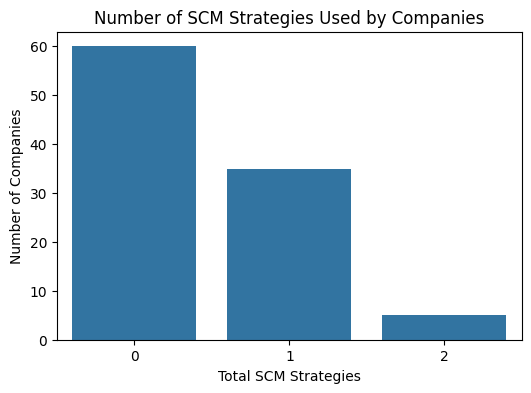

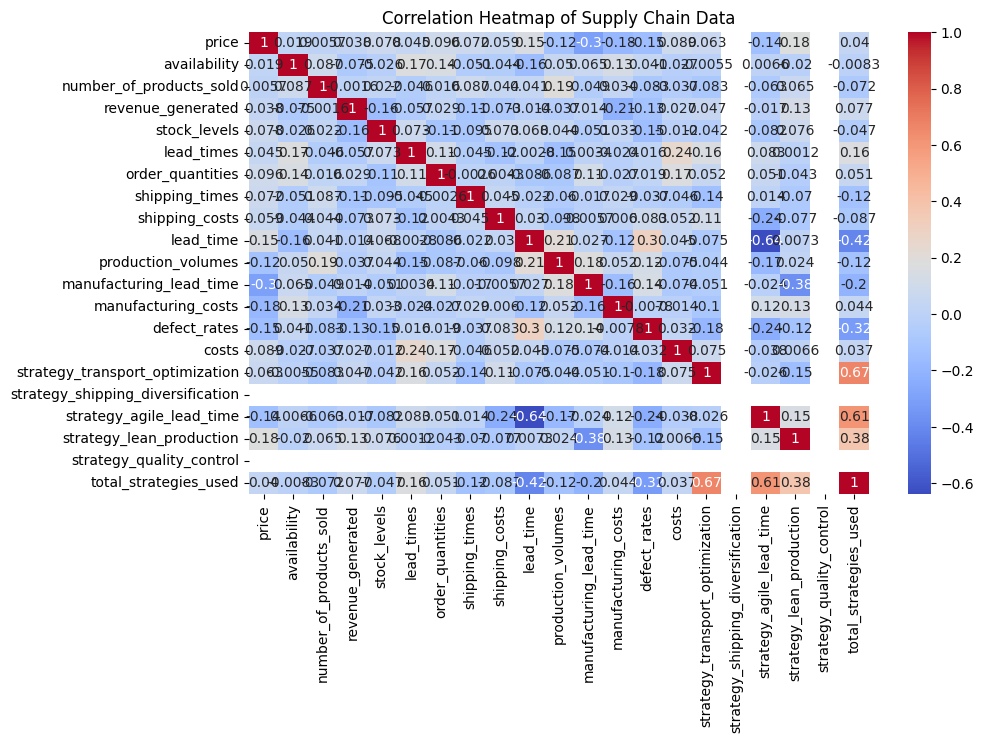

strategy_transport_optimization      26
strategy_shipping_diversification     0
strategy_agile_lead_time             13
strategy_lean_production              6
strategy_quality_control              0
dtype: int64


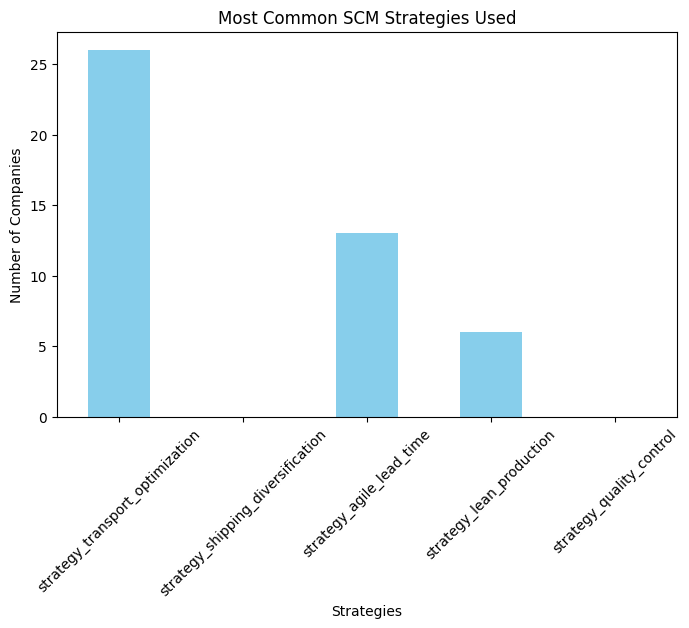

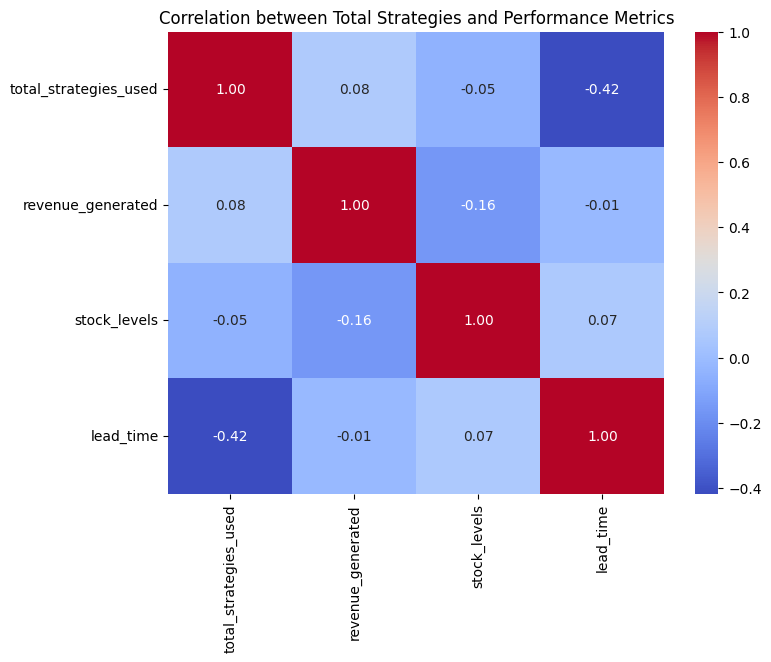

High Performance Revenue: nan
Other Companies' Revenue: 5776.048187380086


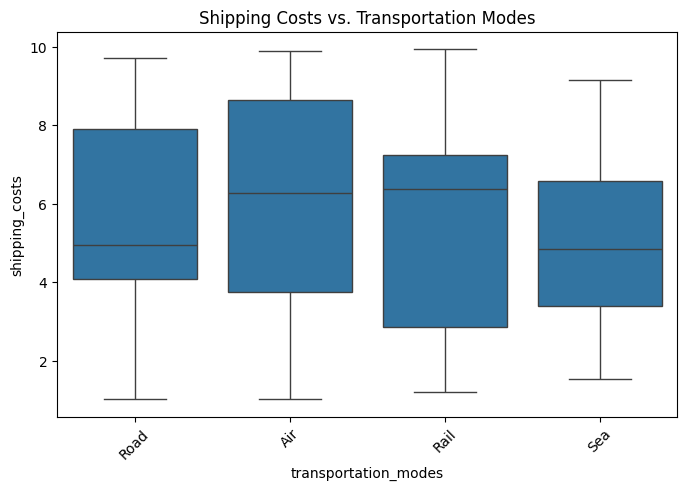

Lean Companies - Average Defect Rate: 1.5701006879162953
Agile Companies - Average Defect Rate: 1.377190677727267


In [7]:
# 📌 Supply Chain Analytics - Data Cleaning & Upload

# Upload your dataset
from google.colab import files
uploaded = files.upload()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the uploaded file
df = pd.read_csv('supply_chain_data.csv')  # ✅ Corrected filename

# Show first few rows
print("First 5 rows:")
display(df.head())

# Dataset info
print("\nDataset Info:")
df.info()

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Summary stats
print("\nSummary Statistics:")
display(df.describe())

# Normalize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# ✅ Step 2: Create Strategy Columns

# Strategy 1: Fast transportation mode (e.g., using "Air" implies high-speed strategy)
df['strategy_transport_optimization'] = df['transportation_modes'].apply(lambda x: 1 if 'Air' in str(x) else 0)

# Strategy 2: Multiple shipping carriers = diversified logistics
df['strategy_shipping_diversification'] = df['shipping_carriers'].apply(lambda x: 1 if ',' in str(x) else 0)

# Strategy 3: Short lead time (<5 days) = agile supply chain
df['strategy_agile_lead_time'] = df['lead_time'].apply(lambda x: 1 if pd.to_numeric(x, errors='coerce') < 5 else 0)

# Strategy 4: Short manufacturing lead time (<3 days) = lean production
df['strategy_lean_production'] = df['manufacturing_lead_time'].apply(lambda x: 1 if pd.to_numeric(x, errors='coerce') < 3 else 0)

# Strategy 5: Good quality control (defect rate < 1%)
df['strategy_quality_control'] = df['defect_rates'].apply(lambda x: 1 if pd.to_numeric(x, errors='coerce') < 0.01 else 0)

# Total strategies used per company
strategy_cols = [
    'strategy_transport_optimization',
    'strategy_shipping_diversification',
    'strategy_agile_lead_time',
    'strategy_lean_production',
    'strategy_quality_control'
]

df['total_strategies_used'] = df[strategy_cols].sum(axis=1)

# Preview the strategy columns and total strategies used
df[strategy_cols + ['total_strategies_used']].head()

# Visualize the number of strategies used
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='total_strategies_used')
plt.title('Number of SCM Strategies Used by Companies')
plt.xlabel('Total SCM Strategies')
plt.ylabel('Number of Companies')
plt.show()

# Correlation heatmap for numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Supply Chain Data")
plt.show()

# 📌 **Question 1:** What are the most common SCM strategies used by companies?
# 📌 **Answer:**
# We created columns for different supply chain strategies (e.g., air transportation, shipping diversification, etc.).
# We will now check which strategies are most commonly used.

# Show the count of each strategy being used
strategy_counts = df[strategy_cols].sum()
print(strategy_counts)

# Visualize the most common strategies
strategy_counts.plot(kind='bar', figsize=(8, 5), color='skyblue')
plt.title('Most Common SCM Strategies Used')
plt.ylabel('Number of Companies')
plt.xlabel('Strategies')
plt.xticks(rotation=45)
plt.show()

# 📌 **Question 2:** How does the number of strategies used affect key performance metrics like revenue, stock levels, and lead time?
# 📌 **Answer:**
# We can analyze if there’s any relationship between the number of strategies used and key performance metrics such as revenue, stock levels, and lead time.
# Let's check the correlation between these variables.

# Correlation between total strategies and performance metrics
correlation_metrics = df[['total_strategies_used', 'revenue_generated', 'stock_levels', 'lead_time']]
correlation_matrix = correlation_metrics.corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Total Strategies and Performance Metrics')
plt.show()

# 📌 **Question 3:** Do companies with better SCM strategies (fewer defects, faster lead times) perform better in terms of revenue?
# 📌 **Answer:**
# Let's compare the revenue generated by companies with low defect rates and fast lead times (agile companies).

# Filter high-performance companies (low defect rate, fast lead time)
high_performance_companies = df[(df['strategy_quality_control'] == 1) & (df['strategy_agile_lead_time'] == 1)]

# Compare revenue in high-performance vs. other companies
high_perf_revenue = high_performance_companies['revenue_generated'].mean()
other_perf_revenue = df[~df.index.isin(high_performance_companies.index)]['revenue_generated'].mean()

print(f"High Performance Revenue: {high_perf_revenue}")
print(f"Other Companies' Revenue: {other_perf_revenue}")

# 📌 **Question 4:** Is there a relationship between the supply chain strategies used and shipping costs or transportation modes?
# 📌 **Answer:**
# Let’s explore the relationship between shipping costs and transportation modes to see if strategy choices influence logistics costs.

# Compare transportation modes and shipping costs
df['shipping_costs'] = pd.to_numeric(df['shipping_costs'], errors='coerce')  # Handle non-numeric data

plt.figure(figsize=(8, 5))
sns.boxplot(x='transportation_modes', y='shipping_costs', data=df)
plt.title('Shipping Costs vs. Transportation Modes')
plt.xticks(rotation=45)
plt.show()

# 📌 **Question 5:** How do companies with different SCM strategies perform in terms of defect rates and inspection results?
# 📌 **Answer:**
# Let’s compare defect rates and inspection results across companies using different SCM strategies.

# Compare defect rates based on strategy (e.g., lean vs. agile)
lean_companies = df[df['strategy_lean_production'] == 1]
agile_companies = df[df['strategy_agile_lead_time'] == 1]

print(f"Lean Companies - Average Defect Rate: {lean_companies['defect_rates'].mean()}")
print(f"Agile Companies - Average Defect Rate: {agile_companies['defect_rates'].mean()}")

In [8]:
# Save the cleaned data to a new CSV file
df.to_csv('cleaned_supply_chain_data.csv', index=False)

# Download the cleaned file to your local machine
from google.colab import files
files.download('cleaned_supply_chain_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>